# <center><u><font size=28, color="#7B241C"> Generalized Linear Models with Python</u> 

## <u> Types Of Variables </u>

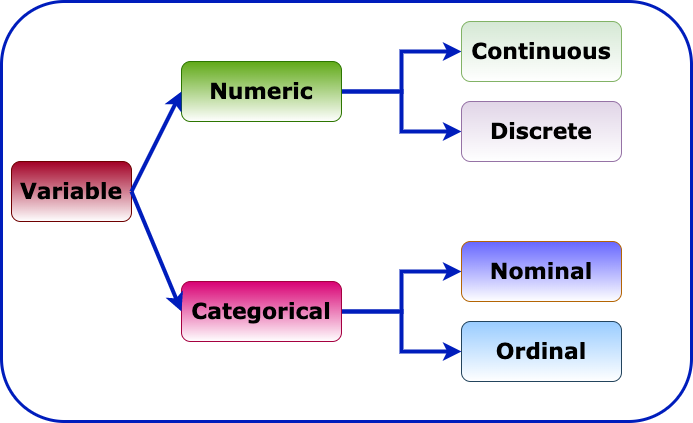

## Generalized Linear Models (GLM)

- $\textbf{Generalized Linear Models or GLM for short}$ is a broad class of models that includes models for continuous response variables such as:
    - Ordinary linear regression model
    - Analysis of variance (ANOVA)
- And Categorical (discrete) response variables such as:
    - logistic regression models
    - Poisson regression models
    - Gamma
    - Negative binomial ... etc.
    

### The Assumptions of General Linear Models:

 1. **Normality**: The random error term $\varepsilon$ has a normal distribution with a mean of zero. 
 
 2. **Constant Variance**: The random error term $\varepsilon$ has a constant variance.
 
 3. **Independence**: The random error terms $\varepsilon_{i}$ are independent. 
 
 4. **Linearity**: the model is correctly specified and linear in parameters.
 
In addition to the previous assumptions, we can make extend them to assume two other assumptions about the explanatory variables:

   - **Independence**: The explanatory variables are linear independent. If this assumption is not met, we will face a situation called **collinearity or more general multi-collinearity**. 
   - The explanatory variables are not random (they are know to use prior to happening). If this assumption is not met, then we will be in the situation of **endogeneity** (chich is gonna be discussed here). 

##### Notes: 
 1. The assumptions on the error term can be summarized mathematically as follows:
 $$\varepsilon \sim \mathcal{N}(\mu,\,\sigma^{2})\,.$$
 
 2. The assumption that the errors are normally distributed is not necessary for estimation of the model parameters and partitioning of the total sum of squares. The least squares estimates are still the best linear unbiased estimates (BLUE) if the other assumptions are met.
 
 3. **Normality** is needed only for:
     - Tests of significance and construction of confidence intervals of the parameters. 
     - The $\mathcal{t}$ test, $\mathcal{F}$ test and $\chi -square$ test require the normality assumption of the residuals.
     - Likewise, the confidence intervals also depend on the the normality assumption (Rawlings, Pantula, and Dickey 1998)


### General Linear Models General Formula

In the general linear model (GLM), a response variable $Y$ is modeled as a linear function of predictor $X$ variables:

### $$\bbox[FloralWhite, 18px, border: 4px solid blue]{General \ \ OLS\ \ Rregression\ \ Model: Y =  \beta X + \varepsilon}$$

**Where**:
 - $\mathbf{Y}$:  is the vector of continous variable
 - $\mathbf{X}$: is a matrix of predictor variables
 - $\boldsymbol \beta$: is a vector of model parameters
 - $\boldsymbol \varepsilon$: is the vector of random errors
 
 
## Generalized Linear Models Components

- A generalize linear model (GLM) consists of three components:

#### 1. A **Random component**: 
  - Which identifies the response variable $\mathcal{Y}$ and its probability distribution. The distribution of the  response variable is a member of an **exponential family** such as Gaussian (Normal), Binomial, Poisson, gamma, ... etc. 
  
#### 2. The **Linear predictor**: 
   - which specifies the explanatory variables through a prediction equation that has a **linear form**. that is, a linear function of regressors.
   
   $$\eta_{i} = \alpha + \beta_{1} X_{i1}+ \ldots + \beta_{k}X_{ik}$$
   
#### 3. **The Link function**:

- The expected value $\mu = E(y)$ of the probability of **Y** has a value that varies according to values of the explanatory variables. 

- The third component of GLM specifies a function $g$  that relates or connects  $\mu = E(Y)$ to the linear predictor. 
 
 $$g(\mu) = \alpha + \beta_{1} X_{i1}+ \ldots + \beta_{k}X_{ik}$$
  
### Examples of Link Functions

 1. **Identity link function**: This is the simplest link function which models the mean directly $g(\mu) = \mu$. It specifies a linear model for the mean response.
 
 
 
 $$(\mu) = \alpha + \beta_{1} X_{i1}+ \ldots + \beta_{k}X_{ik}$$
 
 

- This is the form of ordinary linear models for quatitative response variables. 

- It is clear that linear models are a special case of GLMs with identity link function and a **normally distributed random component**.

2. **Log Link function**: This function relates $\mu$ in a nonlinear fashion to the explanatory variables $g(\mu) = \log(\mu)$. 
    - This link function is useful when $\mu$ is non negative. 


 $$\log(\mu) = \alpha + \beta_{1} X_{i1}+ \ldots + \beta_{k}X_{ik}$$
 
3. **Logit link function**: This function models the log of the odds, which has the form of $g(\mu) = \log \frac{\mu}{1 - \mu}$. 
    - This link function is appropriate when $\mu$ is between 0 and 1, such as a probability.
    - A GLM model that uses logit link function is call a **logistic regression model**.
    
### Note: 
 
 - Each random variable has a probalility distribution. So, if $Y$ is normally distributed, then the function it of the mean is the mean itself. For binomial distribution, the **logit** that models the mean. These are called **natural parameters**. 
 - The link function that uses a **natural parameter** is called **canonical (natural) link function**, such as: 
     - Identity for Gaussian
     - Logit for Binomial
     - Log for Poisson
     - Inverse for Gamma
     - Inverse-square for Inverse-Gaussian.
 - Other link functions exist. For example, using log, square or square-root with binomial is is not **canonical link function**.


# Statsmodels API

# Linear Models with Statsmodels API

In [1]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline

### Data Description: 

- **ID**: Number of student
- **Gender**: gender of student (m, f)
- **AGE**: Student's age (rounded to the nearest thenth of a year)
- **School**: school student attends
- **Teacher**: name of the teacher
- **Semesters**: number of semesters that student attended in the district
- **Letters1**: score on letter indentification test in the fall
- **Phonics1**: score on letter sound test in the fall
- **Words1**: score on word indentification test in the fall
- **Phonics2**: score on letter sound test in the winter
- **Words2**: score on word indentification test in the winter
- **Phonics3**: score on letter sound test in the spring
- **Words3**: score on word indentification test in the spring
- **Reading2**: score on reading test in the winter
- **Fluency2**: score on reading fluency test in the winter
- **Reading3**: score on reading test in the spring
- **Fluency3**: score on reading fluency test in the spring

#### The challenge:
Predict the reading scores (reading3) based on the tests taken by students in the fall.


In [2]:
school = pd.read_csv("school.csv")
school.head()

,Letters1,Phonics1,Words1,Phonics2,Words2,Phonics3,Words3,Reading2,Fluency2,Fluency3,Reading3,Gender,Age,ID,School,Teacher,Semesters
0,15.0,36.0,2.0,74.0,46.0,47.0,77.0,9.0,7.0,29.0,28.0,M,7.0,3,Cottonwood,Miss Jones,6
1,8.0,7.0,1.0,12.0,23.0,52.0,38.0,1.0,0.0,8.0,10.0,M,6.9,5,Cottonwood,Mr. Johnson,6
2,3.0,1.0,0.0,35.0,1.0,10.0,51.0,0.0,0.0,0.0,0.0,M,7.6,7,Cottonwood,Mr. Johnson,6
3,39.0,13.0,13.0,40.0,16.0,63.0,37.0,7.0,9.0,28.0,25.0,M,6.8,16,Cottonwood,Mr. Rogers,4
4,55.0,17.0,22.0,46.0,43.0,47.0,67.0,18.0,12.0,50.0,51.0,M,7.9,33,Cottonwood,Mr. Johnson,6


In [3]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Letters1   163 non-null    float64
 1   Phonics1   163 non-null    float64
 2   Words1     163 non-null    float64
 3   Phonics2   177 non-null    float64
 4   Words2     177 non-null    float64
 5   Phonics3   178 non-null    float64
 6   Words3     179 non-null    float64
 7   Reading2   168 non-null    float64
 8   Fluency2   168 non-null    float64
 9   Fluency3   179 non-null    float64
 10  Reading3   179 non-null    float64
 11  Gender     190 non-null    object 
 12  Age        190 non-null    float64
 13  ID         190 non-null    int64  
 14  School     190 non-null    object 
 15  Teacher    139 non-null    object 
 16  Semesters  190 non-null    int64  
dtypes: float64(12), int64(2), object(3)
memory usage: 25.4+ KB


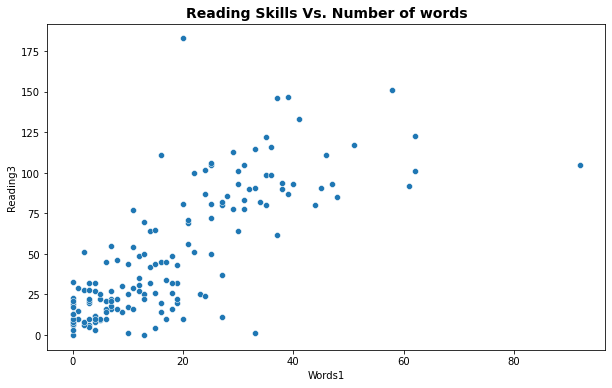

In [4]:
# Draw the scatter plot
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(x = 'Words1',
                y = 'Reading3', 
                data = school)
plt.title("Reading Skills Vs. Number of words", fontsize=14, fontweight = "bold")

# Show the plot
plt.show()

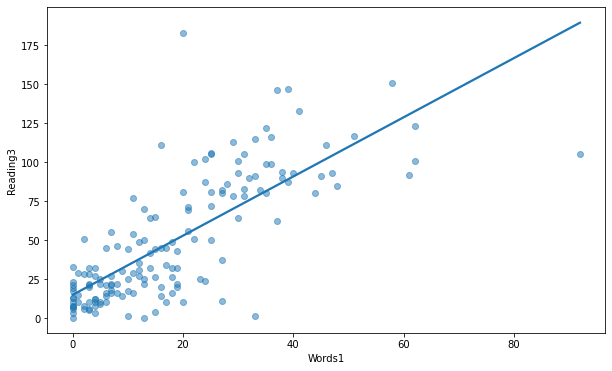

In [5]:
# Draw a trend line on the scatter plot 

sns.regplot(x='Words1',
         y='Reading3',
         data=school,
         ci=False,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

## Estimating Simple Linear Model Using Statsmodels API

In [6]:
# Import the ols function
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [7]:
# Create the model object
model = ols( "Reading3 ~ Words1", data= school) 

# Fit the model
model = model.fit()

# Print the parameters of the fitted model
print(model.params)

Intercept    14.847647
Words1        1.898374
dtype: float64


### Print the Estimated results with `Summary()` Function

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Reading3   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     209.8
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           2.01e-30
Time:                        21:22:51   Log-Likelihood:                -718.44
No. Observations:                 154   AIC:                             1441.
Df Residuals:                     152   BIC:                             1447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8476      3.159      4.700      0.0

### Printing parts of the estimation results 

- `summary()` function has `tables` attribute, with is a list of two elements. 

In [9]:
## Print the first part of the results
print(model.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:               Reading3   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     209.8
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           2.01e-30
Time:                        21:22:52   Log-Likelihood:                -718.44
No. Observations:                 154   AIC:                             1441.
Df Residuals:                     152   BIC:                             1447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


In [10]:
## Print the second part of the results
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8476      3.159      4.700      0.000       8.606      21.090
Words1         1.8984      0.131     14.484      0.000       1.639       2.157


## Multiple Linear Regression Model with Statsmodels API

### Plotting Three Variables against the Reading Response Variable

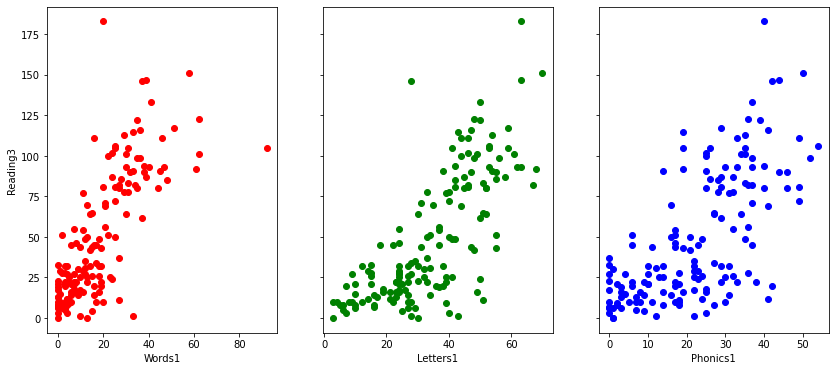

In [11]:
fig, axs = plt.subplots(1, 3, sharey = "row", figsize = (14, 6))
axs[0].scatter(school['Words1'], school['Reading3'], c = 'r')
axs[0].set_ylabel("Reading3")
axs[0].set_xlabel("Words1")

axs[1].scatter(school['Letters1'], school['Reading3'], c = 'g')
axs[1].set_xlabel('Letters1')

axs[2].scatter(school['Phonics1'], school['Reading3'], c = 'b')
axs[2].set_xlabel('Phonics1')
plt.show()

### Fitting Multiple Linear Model

In [12]:
# create and fit the model
mul_model = ols("Reading3 ~ Words1 + Phonics1 + Letters1", 
                data = school).fit()

In [13]:
## Print the results
print(mul_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Reading3   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     114.7
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           1.20e-38
Time:                        21:22:52   Log-Likelihood:                -693.41
No. Observations:                 154   AIC:                             1395.
Df Residuals:                     150   BIC:                             1407.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7937      4.606     -2.343      0.0